# Machine Learning

### k-nearest neighbors algorithm (k-NN)


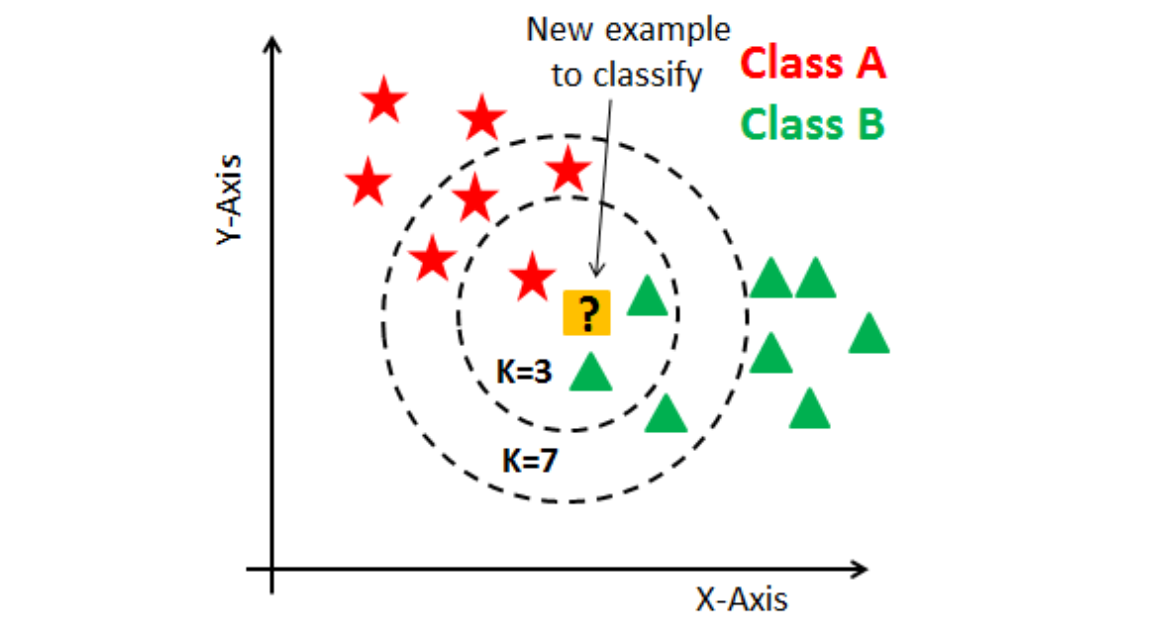




The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems. Evelyn Fix and Joseph Hodges developed this algorithm in 1951, which was subsequently expanded by Thomas Cover. The article explores the fundamentals, workings, and implementation of the KNN algorithm.
<br>
The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.
<br>
KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.
<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 
%matplotlib qt

In [2]:
df=pd.read_csv("C:\\Users\\Nakis\\001 Mr Dr Sadeghi(Data Sience)\\KNN_Project_Data.txt")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
# sns.pairplot(df,hue='TARGET CLASS')

In [5]:
df['TARGET CLASS'].nunique()

2

In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [7]:
# standardization data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
ScData=scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features=pd.DataFrame(ScData,columns=df.columns[:-1])
scaled_features.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.421085e-17,1.891820e-16,2.486900e-17,1.332268e-16,-1.563194e-16,-2.788880e-16,-1.723066e-16,-7.283063e-17,-4.831691e-16,9.769963e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.788339e+00,-2.474303e+00,-2.340083e+00,-3.409927e+00,-2.668575e+00,-3.087121e+00,-2.555607e+00,-2.215822e+00,-2.648319e+00,-2.503543e+00
25%,-7.757873e-01,-7.574735e-01,-7.293713e-01,-6.538711e-01,-6.936419e-01,-6.718168e-01,-7.168625e-01,-7.266069e-01,-7.136450e-01,-6.921254e-01
50%,-2.472083e-02,-3.442255e-02,-1.072910e-02,3.566665e-02,-3.590482e-03,2.911148e-02,8.155695e-03,-8.463946e-02,2.489807e-02,-1.931429e-02
75%,7.308466e-01,7.235137e-01,7.215308e-01,7.386505e-01,6.998930e-01,6.919471e-01,7.032086e-01,6.650219e-01,6.978394e-01,7.253420e-01
max,2.863927e+00,3.009948e+00,2.579241e+00,2.451642e+00,2.465393e+00,2.518753e+00,2.732696e+00,3.198000e+00,3.060964e+00,2.881896e+00


In [8]:
x=pd.DataFrame(scaled_features,columns=df.columns[:-1])
y=(df['TARGET CLASS'])

In [9]:
# Train and Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=101)

In [10]:
# using KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [11]:
# prediction
pred=knn.predict(x_test)

In [12]:
#dff=pd.DataFrame({'labels':y_test,"prediction":pred.flatten()})
dff=pd.DataFrame({'labels':y_test,"prediction":pred})
dff

,labels,prediction
545,1,1
298,1,0
109,0,0
837,1,1
194,0,1
...,...,...
998,1,1
130,1,1
861,1,1
48,1,1


In [13]:
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}")
print("="*20)
print(f"classification report:\n{classification_report(y_test,pred)}")
print("-"*60)

confusion matrix:
[[141  58]
 [ 57 144]]
classification report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       199
           1       0.71      0.72      0.71       201

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

------------------------------------------------------------


In [14]:
#choosing a K-value
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x_train,y_train)
    pred_i=Knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

print(f"for {(np.mean(pred_i!=y_test)*100)}% from Data are unequal")  
    

for 17.5% from Data are unequal


In [15]:
plt.plot(range(1,40),error_rate,color='blue',ls="--",marker='o',markerfacecolor='red',markersize=10)
plt.ylabel("ERROR RATE")
plt.xlabel("K values")

Text(0.5, 0, 'K values')

In [17]:
# using KNN=6
n=7
from sklearn.neighbors import KNeighborsClassifier
knn_new=KNeighborsClassifier(n_neighbors=n)
knn_new.fit(x_train,y_train)
predn=knn.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
print(f"confusion matrix for k={n}:\n{confusion_matrix(y_test,predn)}")
print("="*20)
print(f"classification report for k={n}:\n{classification_report(y_test,predn)}")
print("-"*60)
print(f"knn score for k={n}:{knn_new.score(x_test,y_test)}")

confusion matrix for k=7:
[[141  58]
 [ 57 144]]
classification report for k=7:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       199
           1       0.71      0.72      0.71       201

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

------------------------------------------------------------
knn score for k=7:0.825
